<a href="https://colab.research.google.com/github/szkjiro/program/blob/main/ApproxNormalDist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 標準正規分布の多項式近似とグラフ表示

### 多項式近似関数

標準正規分布を標準偏差がプラスマイナス3の範囲で多項式近似する関数を実装する前に、まず標準正規分布の確率密度関数を定義します。

In [1]:
import numpy as np

def normal_pdf(x, mu=0, sigma=1):
  """標準正規分布の確率密度関数"""
  return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

次に、多項式近似関数を定義します。ここでは、`numpy.polyfit`関数を使って多項式の係数を計算し、`np.poly1d`関数を使って多項式関数を生成します。

In [2]:
def polynomial_approx(x, mu=0, sigma=1, degree=6):
  """標準正規分布を多項式で近似する関数"""
  # 標準正規分布の確率密度関数のデータ点を生成
  x_data = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
  y_data = normal_pdf(x_data, mu, sigma)

  # 多項式の係数を計算
  coeffs = np.polyfit(x_data, y_data, degree)

  # 多項式関数を生成
  p = np.poly1d(coeffs)

  return p(x)

### グラフ表示プログラム

多項式次数が小さいものから順に、標準正規分布の関数と同じ座標上でグラフに同時に表示するプログラムは以下の通りです。

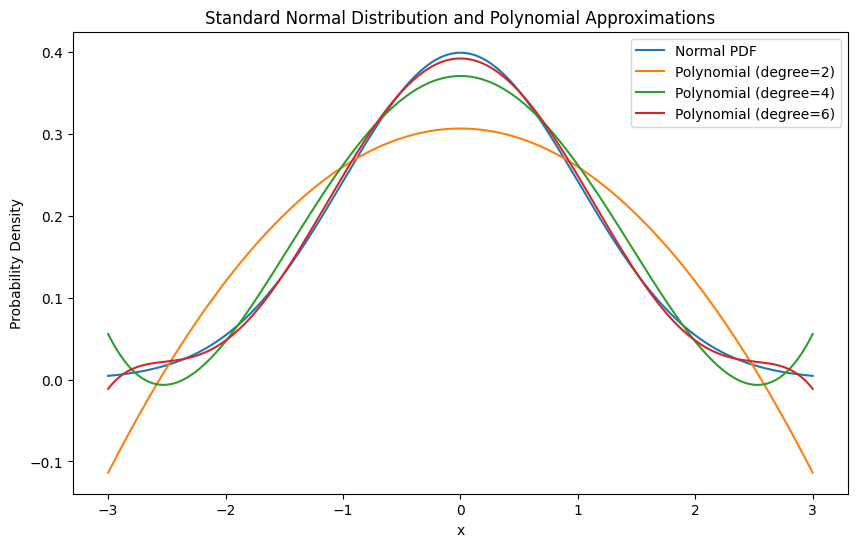

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_normal_and_poly(mu=0, sigma=1, degrees=[2, 4, 6]):
  """標準正規分布と多項式近似関数のグラフを描画する関数"""
  x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 500)

  # 標準正規分布の確率密度関数
  y_normal = normal_pdf(x, mu, sigma)

  # 多項式近似関数
  ys = [polynomial_approx(x, mu, sigma, degree) for degree in degrees]

  # グラフ描画
  plt.figure(figsize=(10, 6))
  plt.plot(x, y_normal, label="Normal PDF")

  for i, y in enumerate(ys):
    label = f"Polynomial (degree={degrees[i]})"
    plt.plot(x, y, label=label)

  plt.xlabel("x")
  plt.ylabel("Probability Density")
  plt.legend()
  plt.title("Standard Normal Distribution and Polynomial Approximations")
  plt.show()

# 例: 多項式次数 2, 4, 6 でグラフを表示
plot_normal_and_poly()

このプログラムを実行すると、標準正規分布の関数と、多項式次数が小さいものから順に近似した関数のグラフが同時に表示されます。多項式次数が大きくなるほど、標準正規分布の関数に近似していることがわかります。

### 注意点

* 上記のプログラムはあくまでも例であり、必要に応じて調整が必要です。
* 多項式近似は、近似する範囲や精度によって適切な次数を選択する必要があります。
* 近似誤差を考慮する必要があります。

## 補足

標準正規分布は確率密度関数として重要であり、様々な分野で利用されています。多項式近似は、計算量を削減したり、解析的に扱ったりする際に有効な方法です。

**ご不明な点がありましたら、お気軽にお問い合わせください。**

### 参考資料

* [https://numpy.org/doc/](https://numpy.org/doc/)
* [https://matplotlib.org/stable/index.html](https://matplotlib.org/stable/index.html)